(lgm-two_time_points-notebook)=
# Dati longitudinali 

L'obiettivo di questo capitolo è esaminare come è possibile estendere i modelli SEM per adattarli alle particolarità dei dati longitudinali. Per semplificare, cominciamo concentrandoci su due misurazioni temporali consecutive.

In [4]:
source("../_common.R")
suppressPackageStartupMessages({
    library("kableExtra")
    library("tidyverse")
})

## Misurare il cambiamento

Il modo più semplice per valutare il cambiamento individuale tra due momenti temporali è calcolare la differenza tra i punteggi ottenuti nelle due occasioni. Tuttavia, questa strategia presenta un problema: non conosciamo il vero punteggio dell'individuo nei due momenti temporali, ma solo un punteggio influenzato dall'errore di misurazione. L'errore di misura può ridurre drasticamente la precisione delle valutazioni sulle differenze individuali nel cambiamento.

Per superare il problema dell'errore di misurazione in analisi longitudinali, vengono utilizzati i modelli *Latent Growth Models* (LGM) nell'ambito dei modelli a equazioni strutturali (SEM).

Questi modelli presuppongono che ciascun individuo segua una traiettoria di cambiamento unica nel tempo. I dati raccolti sono interpretati come la somma di tre componenti:

- (a) Punteggi latenti: Rappresentano il livello individuale in un dato momento.
- (b) Punteggi di cambiamento latenti: Indicano il cambiamento individuale nel tempo.
- (c) Caratteristiche uniche non osservate: Elementi indipendenti delle misurazioni.

Nei modelli SEM, l'equazione fondamentale è espressa come:

$$ \Sigma = \Lambda \Psi \Lambda' + \Theta, $$

dove:
- $ \Sigma $ rappresenta la matrice delle varianze e covarianze dedotte dal modello.
- $ \Lambda $ indica la matrice dei carichi fattoriali, che descrive le relazioni tra gli indicatori e i costrutti.
- $ \Psi $ è la matrice che esprime le varianze e covarianze intercorrenti tra i costrutti.
- $ \Theta $ si riferisce alla matrice delle varianze residue, ovvero quei fattori unici, e alle covarianze residue tra gli indicatori.

In un contesto longitudinale, il modello include tre fattori latenti:

- un fattore che rappresenta il livello latente in un momento specifico;
- un fattore che indica il cambiamento latente tra due momenti;
- un fattore per l'errore di misurazione in ciascun momento. 

Per esplorare le peculiarità di un modello di misurazione longitudinale, consideriamo il caso dello stesso costrutto misurato in due distinte occasioni temporali. Il punteggio osservato di un individuo in un tempo specifico è dato da:

$$
x_{it} = \tau_i + (1)\xi_1 + (t)\xi_2 + \delta_{it},
$$

dove $\tau_i$ rappresenta il livello latente dell'individuo $i$ al tempo iniziale, $\xi_1$ rappresenta il carico del fattore comune per il livello latente al tempo $t_1$, $\xi_2$ rappresenta il carico del fattore comune che rappresenta il cambiamento latente tra i due momenti, e $\delta_{it}$ rappresenta l'errore di misura specifico del momento $t$ per l'individuo $i$.

In questo modello, le intercette osservate sono vincolate a 0, semplificando l'interpretazione e attribuendo la variazione nella variabile dipendente esclusivamente ai fattori latenti di cambiamento.

Se, per esempio, vengono utilizzati 5 indicatori in ciascun momento di misurazione, il modello si articola come segue:

$$
\begin{align}
x_{1} &= 0 + (1)\xi_{1} + (0)\xi_{2} + \delta_{1} \notag\\
x_{2} &= 0 + (1)\xi_{1} + (1)\xi_{2} + \delta_{2} \notag\\
x_{3} &= 0 + (1)\xi_{1} + (2)\xi_{2} + \delta_{3} \notag\\
x_{4} &= 0 + (1)\xi_{1} + (4)\xi_{2} + \delta_{4} \notag\\
x_{5} &= 0 + (1)\xi_{1} + (5)\xi_{2} + \delta_{5} \notag
\end{align}
$$

Inoltre, il modello ipotizza che $\xi_1$ e $\xi_e$ siano correlati, come indicato nella matrice di inter-correlazione fattoriale

$$
\mathbf{\Phi} =
\begin{bmatrix}
\phi_{11} & \\
\phi_{21} & \phi_{22}
\end{bmatrix}
$$

dove $\phi_{11}$ è la varianza dell'intercetta latente, $\phi_{22}$ è la varianza della pendenza latente e $\phi_{21}$ è la covarianza dell’intercetta e della pendenza.

Un elemento distintivo dei modelli longitudinali è la possibilità di correlare le varianze residue degli stessi indicatori misurati in momenti differenti (per esempio, la correlazione tra X1 al Tempo 1 e X1 al Tempo 2). Tale approccio consente di identificare non solo le informazioni condivise dal costrutto attraverso il tempo, ma anche quelle peculiari e specifiche di ogni singolo indicatore in ciascun momento osservato.

Questo approccio permette di esaminare lo sviluppo o il cambiamento di un costrutto latente e dei suoi indicatori nel tempo, offrendo un quadro più accurato e approfondito delle dinamiche di cambiamento. 

Il modello di crescita latente definito dalle equazioni precedenti porta a una serie di previsioni sulla struttura delle medie e delle covarianze dei dati osservati. Queste previsioni del modello vengono utilizzate nel contesto della modellizzazione delle equazioni strutturali per calcolare le stime dei parametri e gli indici di adattamento del modello. La struttura delle covarianze ($\boldsymbol{\Sigma}$) prevista dal modello di crescita latente è

$$
\boldsymbol{\Sigma} = \boldsymbol{\Lambda} \boldsymbol{\Phi} \boldsymbol{\Lambda}' + \boldsymbol{\Theta}.
$$

La {numref}`lgm-fig` mostra il diagramma di percorso del modello LGM che stiamo discutendo.


```{figure} ../images/lgm_stat_mod.png
---
height: 400px
name: lgm-fig
---
Modello di crescita latente.
```

## La Variazione Temporale di Positive Affect

Applichiamo questo modello al caso in cui tre indicatori di Positive Affect (Glad, Cheerful, Happy) vengono misurati in due momenti del tempo (si veda {cite:t}`little2023longitudinal`).

Importiamo i dati.

In [9]:
dat <- read.table(
    file = "../data/grade7and8.long.823.dat",
    col.names = c(
        "PAT1P1", "PAT1P2", "PAT1P3", "NAT1P1", "NAT1P2", "NAT1P3",
        "PAT2P1", "PAT2P2", "PAT2P3", "NAT2P1", "NAT2P2", "NAT2P3",
        "PAT3P1", "PAT3P2", "PAT3P3", "NAT3P1", "NAT3P2", "NAT3P3",
        "grade", "female", "black", "hispanic", "other"
    )
)
glimpse(dat)

Rows: 823
Columns: 23
$ PAT1P1   <dbl> 1.50000, 2.98116, 3.50000, 3.00000, 3.00000, 3.00000, 3.00000…
$ PAT1P2   <dbl> 1.50000, 2.98284, 4.00000, 3.50000, 2.50000, 2.50000, 2.50000…
$ PAT1P3   <dbl> 2.00000, 2.98883, 4.00000, 2.50000, 3.00000, 3.00000, 4.00000…
$ NAT1P1   <dbl> 2.50000, 1.56218, 1.50000, 1.50000, 1.00000, 1.50000, 1.00000…
$ NAT1P2   <dbl> 3.50000, 1.45688, 1.00000, 2.00000, 1.00000, 2.50000, 1.00000…
$ NAT1P3   <dbl> 3.00000, 1.65477, 1.00000, 1.50000, 1.00000, 2.50000, 1.00000…
$ PAT2P1   <dbl> 4.00000, 4.00000, 4.00000, 2.95942, 3.17170, 2.00000, 3.00000…
$ PAT2P2   <dbl> 4.00000, 4.00000, 2.50000, 2.99083, 2.87806, 2.00000, 3.00000…
$ PAT2P3   <dbl> 4.00000, 4.00000, 4.00000, 3.06670, 3.11031, 3.00000, 4.00000…
$ NAT2P1   <dbl> 2.00000, 1.00000, 1.00000, 1.65159, 1.65777, 2.00000, 1.00000…
$ NAT2P2   <dbl> 1.00000, 1.00000, 1.00000, 1.42599, 1.44804, 2.00000, 1.00000…
$ NAT2P3   <dbl> 2.00000, 1.00000, 1.00000, 1.67184, 1.56296, 2.00000, 1.00000…
$ PAT3P1   <dbl> 4

La specificazione del modello SEM longitudinale per questi dati in `lavaan` può essere formulata in modo simile a un modello CFA per un singolo momento del tempo. In questo caso, ci sono due fattori comuni, che chiameremo `Fattore_T1` e `Fattore_T2`, che vengono identificati dagli indicatori misurati nei due momenti del tempo. Questi due fattori comuni sono correlati tra loro.

Tuttavia, la differenza chiave rispetto ai casi precedenti è che anche i fattori specifici di ciascun indicatore nei due momenti del tempo sono correlati tra loro. Questo significa che, oltre alla correlazione tra i fattori comuni `Fattore_T1` e `Fattore_T2`, dobbiamo anche specificare la correlazione tra i fattori specifici dei singoli indicatori nei due momenti del tempo. 

In [6]:
mod_1 <- "
  # Definizione dei fattori latenti al tempo T1
  Fattore_T1 =~ NA*PAT1P1 + PAT1P2 + PAT1P3

  # Definizione dei fattori latenti al tempo T2
  Fattore_T2 =~ NA*PAT2P1 + PAT2P2 + PAT2P3

  # Varianza dei fattori latenti
  Fattore_T1 ~~ 1*Fattore_T1
  Fattore_T2 ~~ 1*Fattore_T2

  # Covarianza tra i fattori latenti
  Fattore_T1 ~~ Fattore_T2

  # Definizione degli errori di misurazione per gli indicatori al tempo T1
  PAT1P1 ~~ PAT1P1
  PAT1P2 ~~ PAT1P2
  PAT1P3 ~~ PAT1P3

  # Definizione degli errori di misurazione per gli indicatori al tempo T2
  PAT2P1 ~~ PAT2P1
  PAT2P2 ~~ PAT2P2
  PAT2P3 ~~ PAT2P3

  # Covarianze tra i residui degli item tra T1 e T2
  PAT1P1 ~~ PAT2P1
  PAT1P2 ~~ PAT2P2
  PAT1P3 ~~ PAT2P3

  # Opzionale: Specifica delle medie degli indicatori (intercette)
  PAT1P1 ~ 1
  PAT1P2 ~ 1
  PAT1P3 ~ 1
  PAT2P1 ~ 1
  PAT2P2 ~ 1
  PAT2P3 ~ 1
"

Le covarianze tra gli errori degli indicatori corrispondenti tra T1 e T2 vengono stimate, indicando potenziali correlazioni tra gli errori degli stessi indicatori nei due momenti temporali.

In questo modello, i carichi fattoriali e le intercettazioni non sono ancora eguagliati nel tempo, il che significa che ogni set di indicatori è libero di avere relazioni uniche con il proprio fattore latente in ciascun momento temporale.

Questo modello è definito "configural-invariant" perché mantiene la stessa struttura fattoriale (o configurazione) nel tempo, ma non impone ancora l'equivalenza dei parametri tra i due momenti temporali.

Il modello configural-invariant è spesso il punto di partenza per testare l'invarianza longitudinale nei SEM, poiché stabilisce una base di confronto prima di imporre vincoli più stringenti come l'invarianza dei carichi fattoriali o delle intercette nei modelli successivi.

Adattiamo il modello ai dati.

In [10]:
fit_1 <- lavaan::sem(mod_1, data = dat, meanstructure = TRUE)

In [11]:
parameterEstimates(fit_1) |> print()

          lhs op        rhs   est    se       z pvalue ci.lower ci.upper
1  Fattore_T1 =~     PAT1P1 0.670 0.022  30.862  0.000    0.628    0.713
2  Fattore_T1 =~     PAT1P2 0.661 0.021  31.241  0.000    0.619    0.702
3  Fattore_T1 =~     PAT1P3 0.643 0.021  29.979  0.000    0.601    0.685
4  Fattore_T2 =~     PAT2P1 0.689 0.021  32.994  0.000    0.648    0.730
5  Fattore_T2 =~     PAT2P2 0.680 0.021  33.049  0.000    0.639    0.720
6  Fattore_T2 =~     PAT2P3 0.639 0.021  31.155  0.000    0.598    0.679
7  Fattore_T1 ~~ Fattore_T1 1.000 0.000      NA     NA    1.000    1.000
8  Fattore_T2 ~~ Fattore_T2 1.000 0.000      NA     NA    1.000    1.000
9  Fattore_T1 ~~ Fattore_T2 0.552 0.027  20.141  0.000    0.498    0.606
10     PAT1P1 ~~     PAT1P1 0.135 0.010  12.919  0.000    0.114    0.155
11     PAT1P2 ~~     PAT1P2 0.121 0.010  12.308  0.000    0.102    0.141
12     PAT1P3 ~~     PAT1P3 0.145 0.010  14.046  0.000    0.125    0.165
13     PAT2P1 ~~     PAT2P1 0.102 0.008  12.160  0.

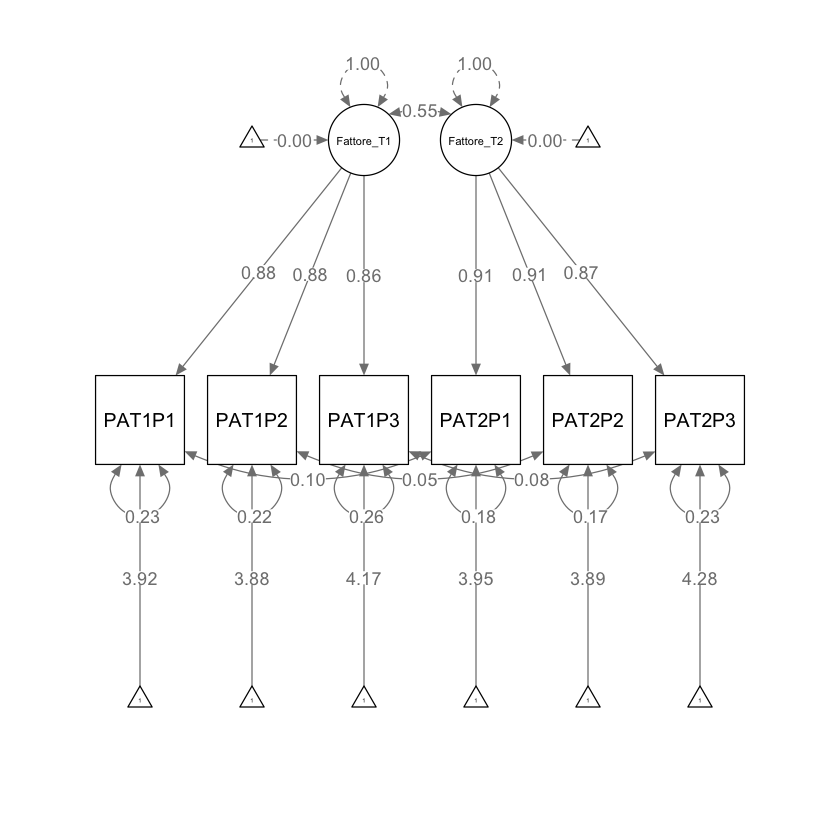

In [12]:
semPaths(fit_1,
    whatLabels = "std",
    sizeMan = 10,
    edge.label.cex = 0.9,
    style = "mx",
    nCharNodes = 0, nCharEdges = 0
)

In [13]:
fitMeasures(fit_1, c("cfi", "tli", "rmsea", "srmr")) |> print()

  cfi   tli rmsea  srmr 
1.000 0.999 0.016 0.010 


Potremmo pensare che modello di baseline (con cui possono essere confrontati i modelli che descrivono il cambiamento temporale) sia semplicemente il modello in cui non sono permesse covarianze tra i due fattori comuni latenti nei due momenti del tempo.

In [14]:
mod_2 <- "
  # Definizione dei fattori latenti al tempo T1
  Fattore_T1 =~ NA*PAT1P1 + PAT1P2 + PAT1P3

  # Definizione dei fattori latenti al tempo T2
  Fattore_T2 =~ NA*PAT2P1 + PAT2P2 + PAT2P3

  # Varianza dei fattori latenti
  Fattore_T1 ~~ 1*Fattore_T1
  Fattore_T2 ~~ 1*Fattore_T2

  # Covarianza tra i fattori latenti
  Fattore_T1 ~~ 0*Fattore_T2

  # Definizione degli errori di misurazione per gli indicatori al tempo T1
  PAT1P1 ~~ PAT1P1
  PAT1P2 ~~ PAT1P2
  PAT1P3 ~~ PAT1P3

  # Definizione degli errori di misurazione per gli indicatori al tempo T2
  PAT2P1 ~~ PAT2P1
  PAT2P2 ~~ PAT2P2
  PAT2P3 ~~ PAT2P3

  # Covarianze tra i residui degli item tra T1 e T2
  # PAT1P1 ~~ PAT2P1
  # PAT1P2 ~~ PAT2P2
  # PAT1P3 ~~ PAT2P3

  # Opzionale: Specifica delle medie degli indicatori (intercette)
  PAT1P1 ~ 1
  PAT1P2 ~ 1
  PAT1P3 ~ 1
  PAT2P1 ~ 1
  PAT2P2 ~ 1
  PAT2P3 ~ 1
"

In [15]:
fit_2 <- lavaan::sem(mod_2, data = dat, meanstructure = TRUE)

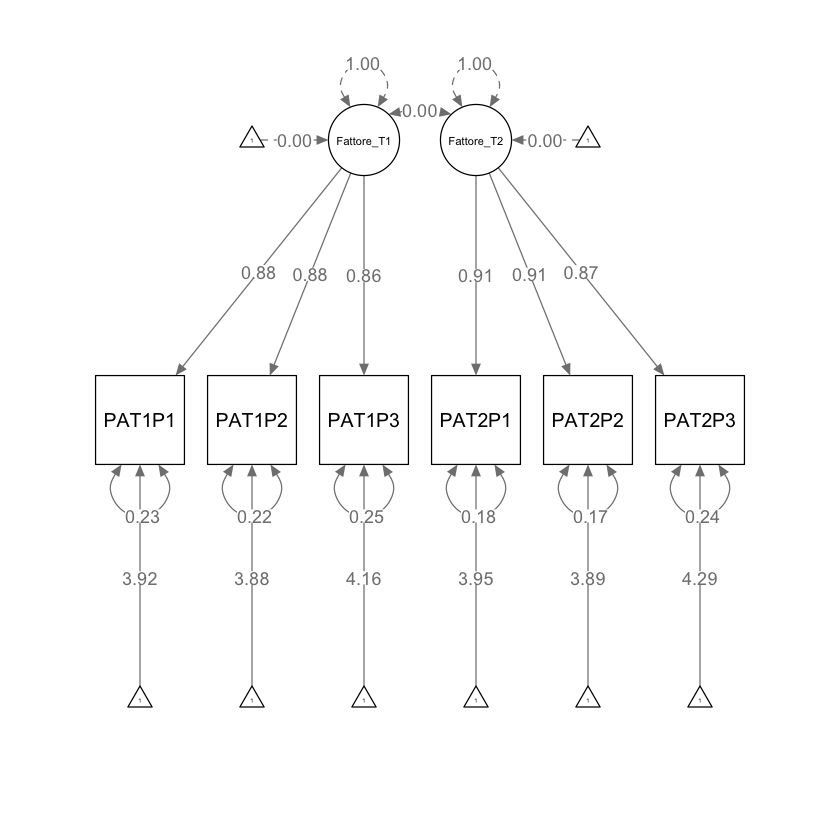

In [16]:
semPaths(fit_2,
    whatLabels = "std",
    sizeMan = 10,
    edge.label.cex = 0.9,
    style = "mx",
    nCharNodes = 0, nCharEdges = 0
)

In [17]:
parameterEstimates(fit_2) |> print()

          lhs op        rhs   est    se       z pvalue ci.lower ci.upper
1  Fattore_T1 =~     PAT1P1 0.670 0.022  30.720      0    0.627    0.713
2  Fattore_T1 =~     PAT1P2 0.658 0.021  30.943      0    0.616    0.700
3  Fattore_T1 =~     PAT1P3 0.647 0.021  30.105      0    0.605    0.689
4  Fattore_T2 =~     PAT2P1 0.689 0.021  32.917      0    0.648    0.730
5  Fattore_T2 =~     PAT2P2 0.681 0.021  33.073      0    0.641    0.722
6  Fattore_T2 =~     PAT2P3 0.636 0.021  30.961      0    0.596    0.676
7  Fattore_T1 ~~ Fattore_T1 1.000 0.000      NA     NA    1.000    1.000
8  Fattore_T2 ~~ Fattore_T2 1.000 0.000      NA     NA    1.000    1.000
9  Fattore_T1 ~~ Fattore_T2 0.000 0.000      NA     NA    0.000    0.000
10     PAT1P1 ~~     PAT1P1 0.135 0.011  12.641      0    0.114    0.156
11     PAT1P2 ~~     PAT1P2 0.125 0.010  12.310      0    0.105    0.145
12     PAT1P3 ~~     PAT1P3 0.141 0.010  13.503      0    0.120    0.161
13     PAT2P1 ~~     PAT2P1 0.102 0.009  11.872    

In [18]:
fitMeasures(fit_2, c("cfi", "tli", "rmsea", "srmr")) |> print()

  cfi   tli rmsea  srmr 
0.931 0.886 0.187 0.253 


Tuttavia, come sottolineato da {cite:t}`little2023longitudinal`, il modello base adeguato richiede l'aggiunta di specifiche aspettative. In particolare, è essenziale presupporre che medie e varianze restino costanti nel tempo. Questo ampliamento del modello nullo offre un punto di confronto idoneo per analizzare e interpretare efficacemente i dati longitudinali.

In [33]:
mod_3 <- "
  # Definizione dei fattori latenti al tempo T1
  Fattore_T1 =~ NA*PAT1P1 + b1*PAT1P2 + b2*PAT1P3

  # Definizione dei fattori latenti al tempo T2
  Fattore_T2 =~ NA*PAT2P1 + b1*PAT2P2 + b2*PAT2P3

  # Varianza dei fattori latenti
  Fattore_T1 ~~ c1*Fattore_T1
  Fattore_T2 ~~ c1*Fattore_T2

  # Covarianza tra i fattori latenti (assumendo che sia 0)
  Fattore_T1 ~~ 0*Fattore_T2

  # Definizione degli errori di misurazione per gli indicatori al tempo T1
  PAT1P1 ~~ a1*PAT1P1
  PAT1P2 ~~ a2*PAT1P2
  PAT1P3 ~~ a3*PAT1P3

  # Definizione degli errori di misurazione per gli indicatori al tempo T2
  PAT2P1 ~~ a1*PAT2P1
  PAT2P2 ~~ a2*PAT2P2
  PAT2P3 ~~ a3*PAT2P3

  # Specifica delle medie degli indicatori (intercette) uguali tra i due tempi
  # PAT1P1 ~ m1
  # PAT1P2 ~ m2
  # PAT1P3 ~ m3
  # PAT2P1 ~ m1
  # PAT2P2 ~ m2
  # PAT2P3 ~ m3
"

In [34]:
fit_3 <- lavaan::sem(mod_3, data = dat, meanstructure = TRUE)

Warning message in lav_model_vcov(lavmodel = lavmodel, lavsamplestats = lavsamplestats, :
“lavaan WARNING:
    The variance-covariance matrix of the estimated parameters (vcov)
    does not appear to be positive definite! The smallest eigenvalue
    (= 2.757183e-17) is close to zero. This may be a symptom that the
    model is not identified.”


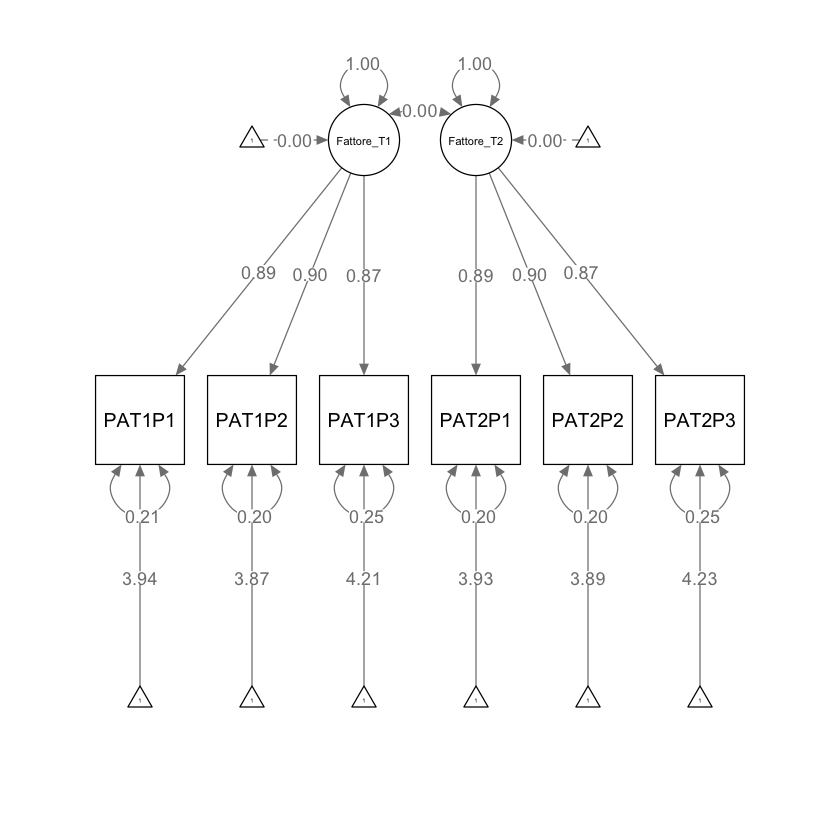

In [35]:
semPaths(fit_3,
    whatLabels = "std",
    sizeMan = 10,
    edge.label.cex = 0.9,
    style = "mx",
    nCharNodes = 0, nCharEdges = 0
)

In [36]:
parameterEstimates(fit_3) |> print()

          lhs op        rhs label   est    se       z pvalue ci.lower ci.upper
1  Fattore_T1 =~     PAT1P1       0.863 0.018  47.730      0    0.828    0.898
2  Fattore_T1 =~     PAT1P2    b1 0.854 0.012  71.968      0    0.831    0.878
3  Fattore_T1 =~     PAT1P3    b2 0.818 0.012  66.282      0    0.794    0.842
4  Fattore_T2 =~     PAT2P1       0.871 0.018  48.118      0    0.835    0.906
5  Fattore_T2 =~     PAT2P2    b1 0.854 0.012  71.968      0    0.831    0.878
6  Fattore_T2 =~     PAT2P3    b2 0.818 0.012  66.282      0    0.794    0.842
7  Fattore_T1 ~~ Fattore_T1    c1 0.614 0.014  44.667      0    0.587    0.641
8  Fattore_T2 ~~ Fattore_T2    c1 0.614 0.014  44.667      0    0.587    0.641
9  Fattore_T1 ~~ Fattore_T2       0.000 0.000      NA     NA    0.000    0.000
10     PAT1P1 ~~     PAT1P1    a1 0.119 0.007  17.380      0    0.105    0.132
11     PAT1P2 ~~     PAT1P2    a2 0.111 0.007  16.933      0    0.098    0.123
12     PAT1P3 ~~     PAT1P3    a3 0.134 0.007  19.94

In [37]:
fitMeasures(fit_3, c("cfi", "tli", "rmsea", "srmr")) |> print()

  cfi   tli rmsea  srmr 
0.927 0.916 0.160 0.254 


Possiamo ora fare il confronto tra il modello di cambiamento latente e l'appropriato modello di confronto.

In [38]:
lavTestLRT(fit_1, fit_3) |> print()


Chi-Squared Difference Test

      Df    AIC    BIC    Chisq Chisq diff   RMSEA Df diff Pr(>Chisq)    
fit_1  5 7427.8 7531.4   6.0645                                          
fit_3 13 7693.5 7759.5 287.8078     281.74 0.20391       8  < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


È evidente che, nel contesto di questi dati, un modello che presuma l'assenza di qualsiasi cambiamento è completamente inadeguato.